# Neural Network For Handwritten Digits Classification 
## Author : Kshitij Agrawal

**MNIST Handwritten Digit Classification**

In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [22]:
(x_train,y_train),(x_test, y_test)=keras.datasets.mnist.load_data()

In [23]:
print(len(x_train))
print(len(x_test))

60000
10000


In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

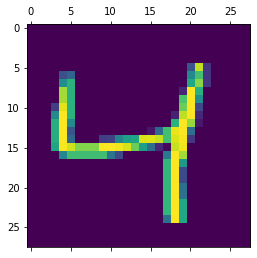

In [26]:
plt.matshow(x_train[2])

In [27]:
y_train[2]

4

In [28]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [29]:
x_test.shape

(10000, 28, 28)

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
import pandas as pd

In [32]:
#performing Scaling
x_train=x_train/255
x_test=x_test/255

In [33]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [34]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [35]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4713 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9264


In [37]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9262


[0.26758483052253723, 0.9261999726295471]

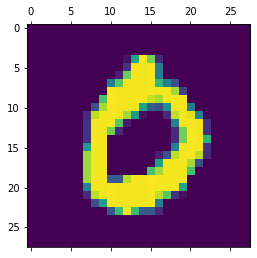

In [38]:
plt.matshow(x_test[3])

In [39]:
y_predicted=model.predict(x_test_flattened)
y_predicted[3]

array([9.9930954e-01, 2.1805455e-08, 8.5405946e-02, 4.2350590e-03,
       4.4387678e-05, 1.0024193e-01, 5.0165713e-02, 3.0027658e-02,
       1.6071320e-02, 1.1959493e-02], dtype=float32)

In [40]:
np.argmax(y_predicted[3]) 

0

In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    1,    0,    7,    5,    4,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    8,  934,   15,    8,    5,   12,   11,   32,    4],
       [   4,    0,   19,  920,    0,   25,    2,   13,   20,    7],
       [   2,    1,    7,    1,  915,    0,    8,    5,   10,   33],
       [   9,    3,    5,   30,    8,  784,   12,    7,   26,    8],
       [  12,    3,   10,    1,    8,   16,  905,    2,    1,    0],
       [   1,    6,   22,    7,    4,    0,    0,  963,    2,   23],
       [   6,    9,    8,   24,    9,   31,    9,   12,  856,   10],
       [  10,    7,    2,   10,   28,    8,    0,   31,    5,  908]])>

Text(69.0, 0.5, 'Truth')

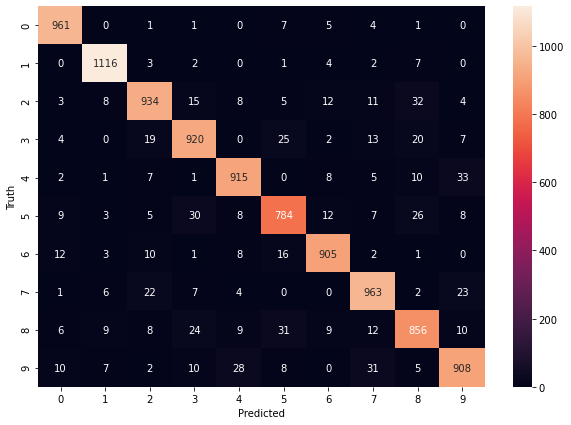

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Our Model With hidden Layers

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2663 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1208 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0857 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9843


In [46]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9772


[0.0778837576508522, 0.9771999716758728]

In [47]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [48]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [49]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    1,    0,    7,    5,    4,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    8,  934,   15,    8,    5,   12,   11,   32,    4],
       [   4,    0,   19,  920,    0,   25,    2,   13,   20,    7],
       [   2,    1,    7,    1,  915,    0,    8,    5,   10,   33],
       [   9,    3,    5,   30,    8,  784,   12,    7,   26,    8],
       [  12,    3,   10,    1,    8,   16,  905,    2,    1,    0],
       [   1,    6,   22,    7,    4,    0,    0,  963,    2,   23],
       [   6,    9,    8,   24,    9,   31,    9,   12,  856,   10],
       [  10,    7,    2,   10,   28,    8,    0,   31,    5,  908]])>

Text(69.0, 0.5, 'Truth')

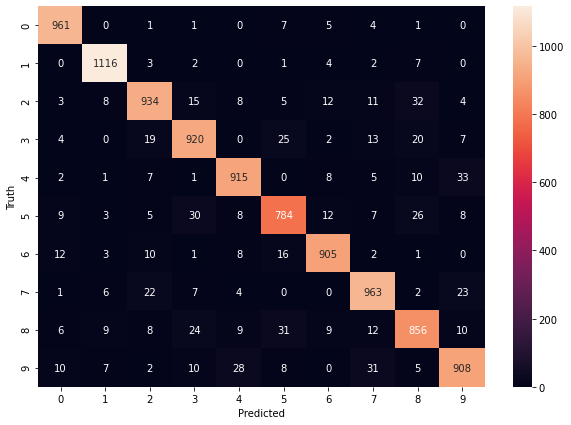

In [50]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#  Using Flatten layer so that we don't have to call .reshape on input dataset

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2762 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1261 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9842


In [52]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9755


[0.07789016515016556, 0.9754999876022339]